<a href="https://colab.research.google.com/github/DaraRahma536/Tugas_ML/blob/main/Hands-on%20Machine%20Learning%20with%20Scikit-Learn%2C%20Keras%2C%20and%20TensorFlow%20(O%E2%80%99Reilly)Chapter_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHAPTER 10: Introduction to Artificial Neural Networks with Keras**

# **1. Konsep Dasar ANN dan Sejarah**
---
Artificial Neural Networks (ANNs) terinspirasi dari jaringan saraf biologis otak manusia. Meskipun analogi biologis menjadi titik awal, ANN modern telah berkembang jauh berbeda dari neuron biologis. Perkembangan ANN mengalami beberapa gelombang dengan periode "AI Winter" di mana penelitian ditinggalkan, kemudian bangkit kembali dengan kemajuan komputasi dan data.

Alasan Kebangkitan ANN Modern:
* Big Data: Ketersediaan data dalam jumlah besar
* Komputasi GPU: Kemampuan pemrosesan paralel
* Algoritma Improved: Perbaikan teknik training
* Cloud Computing: Aksesibilitas komputasi awan
* Siklus Virtuous: Funding → Research → Product → More Funding

# **2. Dari Neuron Biologis ke Artificial Neuron**
---
Neuron biologis terdiri dari dendrit, soma, akson, dan sinapsis. McCulloch dan Pitts (1943) membuat model matematis sederhana dari neuron ini. Mereka menunjukkan bahwa jaringan neuron sederhana dapat melakukan operasi logika.
```
# Representasi operasi logika dengan neuron McCulloch-Pitts

# 1. IDENTITY FUNCTION: C = A
#    Neuron C aktif jika menerima 2 sinyal dari A

# 2. AND FUNCTION: C = A ∧ B
#    Neuron C aktif hanya jika menerima sinyal dari A DAN B

# 3. OR FUNCTION: C = A ∨ B  
#    Neuron C aktif jika menerima sinyal dari A ATAU B

# 4. NOT FUNCTION: C = ¬A
#    Dengan koneksi inhibitor, neuron C aktif jika A tidak aktif

# XOR Problem: A ⊕ B = (A ∧ ¬B) ∨ (¬A ∧ B)
# Perceptron tunggal TIDAK bisa menyelesaikan XOR
```



# **3. Perceptron dan Implementasinya**
---
Perceptron ditemukan oleh Frank Rosenblatt (1957) menggunakan Threshold Logic Unit (TLU). Single-layer perceptron dapat melakukan klasifikasi biner linear tetapi memiliki keterbatasan (seperti tidak bisa menyelesaikan XOR).

### **Implementasi Perceptron dengan Scikit-Learn**
Perceptron adalah salah satu arsitektur ANN paling sederhana. Di sini kita menggunakan implementasi Perceptron dari Scikit-Learn untuk klasifikasi biner pada dataset Iris. Kita hanya menggunakan fitur panjang dan lebar petal untuk mengklasifikasikan apakah bunga termasuk spesies Iris setosa atau tidak.

Input: [[2, 0.5]]
Prediksi: [1]
Interpretasi: Iris Setosa
Training accuracy: 100.00%
Weight vector (w): [[-0.14 -0.22]]
Bias term (b): [0.4]

VISUALISASI DECISION BOUNDARY:


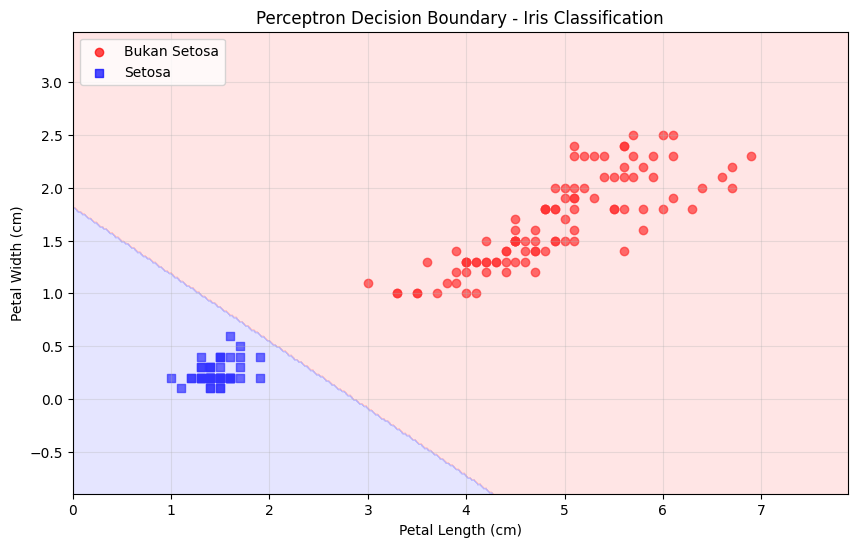

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Memuat dataset Iris
iris = load_iris()
X = iris.data[:, (2, 3)]  # menggunakan petal length dan width
y = (iris.target == 0).astype(int)  # klasifikasi biner: Iris setosa atau bukan

# Membuat dan melatih Perceptron
per_clf = Perceptron(random_state=42, max_iter=1000, eta0=0.1)
per_clf.fit(X, y)

# Memprediksi instance baru
test_instance = [[2, 0.5]]
y_pred = per_clf.predict(test_instance)
y_train_pred = per_clf.predict(X)
train_accuracy = accuracy_score(y, y_train_pred)


# Evaluasi pada training data
print(f"Input: {test_instance}")
print(f"Prediksi: {y_pred}")
print(f"Interpretasi: {'Iris Setosa' if y_pred[0] == 1 else 'Bukan Iris Setosa'}")
print(f"Training accuracy: {train_accuracy:.2%}")
print(f"Weight vector (w): {per_clf.coef_}")
print(f"Bias term (b): {per_clf.intercept_}")

# Visualisasi decision boundary
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

print("\nVISUALISASI DECISION BOUNDARY:")
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(X[y==0, 0], X[y==0, 1],
            c='red', marker='o', label='Bukan Setosa', alpha=0.7)
plt.scatter(X[y==1, 0], X[y==1, 1],
            c='blue', marker='s', label='Setosa', alpha=0.7)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = per_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Perceptron Decision Boundary - Iris Classification')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

# **4. Multilayer Perceptron (MLP) dan Backpropagation**
---
MLP mengatasi keterbatasan perceptron tunggal dengan menambahkan hidden layers. Arsitektur dasar MLP:
* Input Layer: Menerima data masukan
* Hidden Layers: Memproses pola kompleks (1+ layer)
* Output Layer: Menghasilkan prediksi

**Backpropagation** (Rumelhart, Hinton, Williams, 1986) adalah algoritma training yang:
* Forward pass: Hitung output
* Hitung error
* Backward pass: Hitung gradient
* Update weights dengan Gradient Descent

**Mengapa Backpropagation Berhasil:**
* Menggunakan activation functions differentiable (sigmoid, tanh, ReLU)
* Random weight initialization untuk memecah simetri
* Chain rule untuk menghitung gradient secara efisien



**Building Image Classifier dengan Sequential API**

IMAGE CLASSIFIER DENGAN SEQUENTIAL API

1. MEMUAT DATASET FASHION MNIST...
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train_full shape: (60000, 28, 28)
y_train_full shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
Pixel value range: [0, 255]
Data type: uint8

2. MEMBUAT VALIDATION SET DAN SCALING...
Training set: 55000 images
Validation set: 5000 images
Test set: 10000 images
Scaled pixel range: [0.00, 1.00]

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

3. CONTOH GAMBAR DARI DATASET:


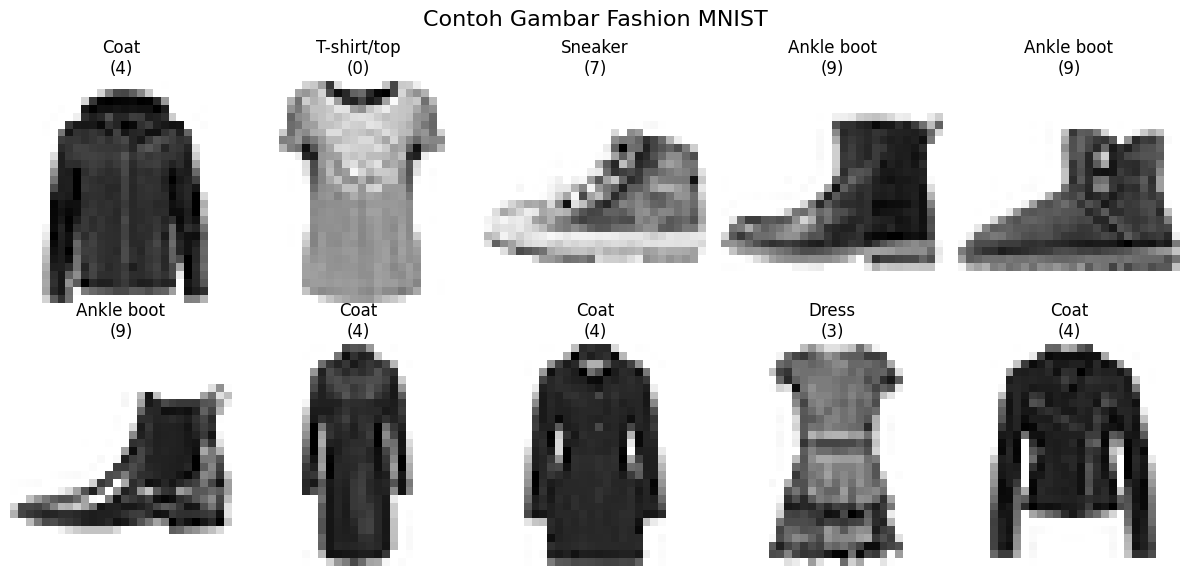


4. MEMBANGUN MODEL SEQUENTIAL...
Model architecture summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)


5. DETAIL LAYERS DAN PARAMETERS:

Layer 0: flatten
  Type: Flatten
  Output shape: (None, 784)

Layer 1: hidden1
  Type: Dense
  Output shape: (None, 300)
  Neurons: 300
  Activation: relu

Layer 2: hidden2
  Type: Dense
  Output shape: (None, 100)
  Neurons: 100
  Activation: relu

Layer 3: output
  Type: Dense
  Output shape: (None, 10)
  Neurons: 10
  Activation: softmax

6. COMPILE MODEL...
Optimizer: SGD dengan learning_rate=0.01
Loss function: sparse_categorical_crossentropy
Metrics: ['accuracy']

7. TRAINING MODEL (5 EPOCH UNTUK DEMO)...
Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6829 - loss: 1.0062 - val_accuracy: 0.8336 - val_loss: 0.5043
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8264 - loss: 0.5059 - val_accuracy: 0.8462 - val_loss: 0.4449
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8426 - loss: 0.4491 - val_accuracy: 0.8560 - val_loss: 0.4195
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accura

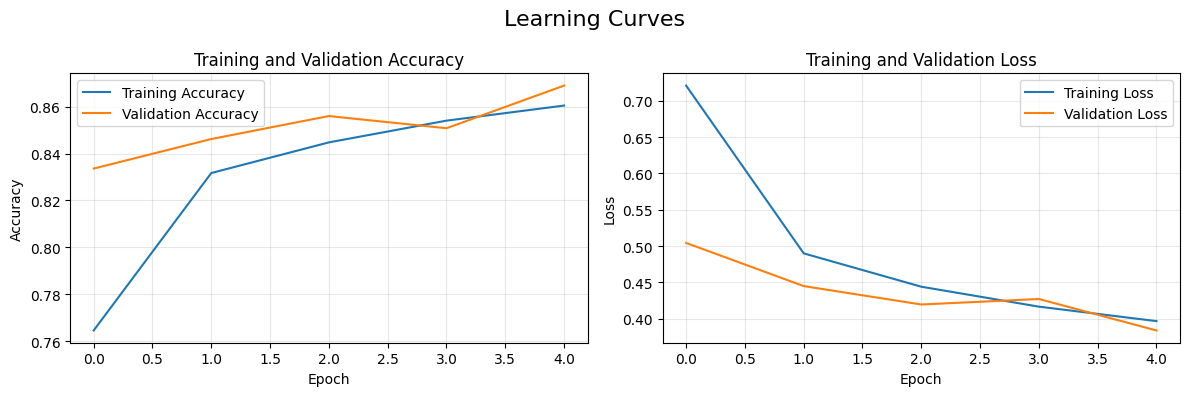

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

print("=" * 60)
print("IMAGE CLASSIFIER DENGAN SEQUENTIAL API")
print("=" * 60)

# Memuat dataset Fashion MNIST
print("\n1. MEMUAT DATASET FASHION MNIST...")
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(f"X_train_full shape: {X_train_full.shape}")
print(f"y_train_full shape: {y_train_full.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Pixel value range: [{X_train_full.min()}, {X_train_full.max()}]")
print(f"Data type: {X_train_full.dtype}")

# Membuat validation set dan scaling
print("\n2. MEMBUAT VALIDATION SET DAN SCALING...")
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

print(f"Training set: {X_train.shape[0]} images")
print(f"Validation set: {X_valid.shape[0]} images")
print(f"Test set: {X_test.shape[0]} images")
print(f"Scaled pixel range: [{X_train.min():.2f}, {X_train.max():.2f}]")

# Nama kelas
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print(f"\nClass names: {class_names}")

# Menampilkan contoh gambar
print("\n3. CONTOH GAMBAR DARI DATASET:")
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap="binary")
    plt.axis('off')
    plt.title(f"{class_names[y_train[i]]}\n({y_train[i]})")
plt.suptitle("Contoh Gambar Fashion MNIST", fontsize=16)
plt.tight_layout()
plt.show()

# Membangun model
print("\n4. MEMBANGUN MODEL SEQUENTIAL...")
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu", name="hidden1"),
    keras.layers.Dense(100, activation="relu", name="hidden2"),
    keras.layers.Dense(10, activation="softmax", name="output")
])

print("Model architecture summary:")
model.summary()

# Menampilkan detail layers
print("\n5. DETAIL LAYERS DAN PARAMETERS:")
for i, layer in enumerate(model.layers):
    print(f"\nLayer {i}: {layer.name}")
    print(f"  Type: {type(layer).__name__}")
    # Use layer.output.shape for more robust access to output shape
    if hasattr(layer, 'output') and layer.output is not None:
        print(f"  Output shape: {layer.output.shape}")
    else:
        print(f"  Output shape: Not available")

    if hasattr(layer, 'units'):
        print(f"  Neurons: {layer.units}")
    if hasattr(layer, 'activation'):
        print(f"  Activation: {layer.activation.__name__ if callable(layer.activation) else layer.activation}")

# Compile model
print("\n6. COMPILE MODEL...")
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

print("Optimizer: SGD dengan learning_rate=0.01")
print("Loss function: sparse_categorical_crossentropy")
print("Metrics: ['accuracy']")

# Training model (hanya 5 epoch untuk demo)
print("\n7. TRAINING MODEL (5 EPOCH UNTUK DEMO)...")
history = model.fit(X_train, y_train,
                    epochs=5,
                    validation_data=(X_valid, y_valid),
                    verbose=1)

# Menampilkan training history
print("\n8. TRAINING HISTORY:")
print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final training loss: {history.history['loss'][-1]:.4f}")
print(f"Final validation loss: {history.history['val_loss'][-1]:.4f}")

# Plot learning curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.suptitle('Learning Curves', fontsize=16)
plt.tight_layout()
plt.show()

# **5. Activation Functions**
---
Activation function menentukan output neuron berdasarkan weighted sum. Beberapa fungsi populer:

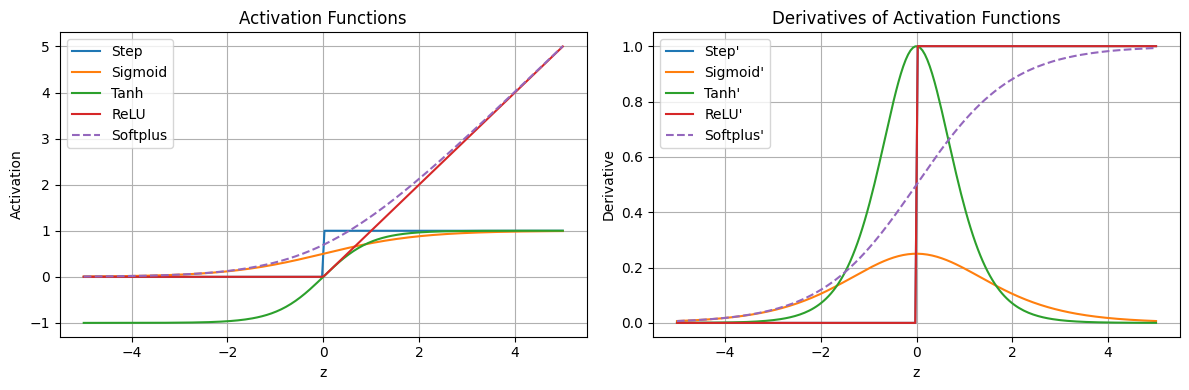

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi berbagai activation functions
def step_function(z):
    return np.where(z >= 0, 1, 0)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(0, z)

def softplus(z):
    return np.log(1 + np.exp(z))

# Plot activation functions
z = np.linspace(-5, 5, 200)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(z, step_function(z), label="Step")
plt.plot(z, sigmoid(z), label="Sigmoid")
plt.plot(z, tanh(z), label="Tanh")
plt.plot(z, relu(z), label="ReLU")
plt.plot(z, softplus(z), label="Softplus", linestyle="--")
plt.title("Activation Functions")
plt.xlabel("z")
plt.ylabel("Activation")
plt.legend()
plt.grid(True)

# Plot derivatives
plt.subplot(1, 2, 2)
plt.plot(z, np.where(z >= 0, 1, 0), label="Step'")
plt.plot(z, sigmoid(z) * (1 - sigmoid(z)), label="Sigmoid'")
plt.plot(z, 1 - tanh(z)**2, label="Tanh'")
plt.plot(z, np.where(z >= 0, 1, 0), label="ReLU'")
plt.plot(z, sigmoid(z), label="Softplus'", linestyle="--")
plt.title("Derivatives of Activation Functions")
plt.xlabel("z")
plt.ylabel("Derivative")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Karakteristik masing-masing:**
* Step: Tidak differentiable, hanya untuk perceptron klasik
* Sigmoid: Output (0,1), mengalami vanishing gradient
* Tanh: Output (-1,1), lebih baik untuk centered data
* ReLU: Paling populer, cepat, tidak saturasi untuk z>0
* Softplus: Smooth version of ReLU

# **6. Regression MLPs - Arsitektur dan Loss Functions**
---
Untuk regression tasks, arsitektur MLP berbeda dari classification:

In [5]:
from tensorflow import keras

# Arsitektur MLP untuk regression
def create_regression_mlp(input_shape, n_hidden=2, n_neurons=50):
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=input_shape))

    # Hidden layers dengan ReLU
    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))

    # Output layer: 1 neuron, tanpa activation untuk regression
    model.add(keras.layers.Dense(1))

    # Compile dengan MSE loss
    model.compile(
        loss="mean_squared_error",
        optimizer=keras.optimizers.SGD(learning_rate=0.01),
        metrics=["mse"]  # Mean Squared Error sebagai metric
    )

    return model

# Contoh penggunaan untuk California Housing dataset
# (Data loading seperti sebelumnya)
# model = create_regression_mlp(input_shape=X_train.shape[1:])
# history = model.fit(X_train, y_train, epochs=100, ...)

### **Loss Functions untuk Regression:**
* MSE (Mean Squared Error): Standard, sensitif terhadap outliers
```
# MSE = 1/m Σ(y_pred - y_true)²
```
* MAE (Mean Absolute Error): Lebih robust terhadap outliers
```
# MAE = 1/m Σ|y_pred - y_true|
```
* Huber Loss: Kombinasi MSE dan MAE
```
# Huber = { 0.5*(y_pred-y_true)² jika |error| ≤ δ
#         { δ*(|error| - 0.5*δ)   jika |error| > δ
```




### **Regression MLP untuk California Housing**

Memuat dataset:

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow import keras

print("=" * 60)
print("REGRESSION MLP UNTUK CALIFORNIA HOUSING")
print("=" * 60)

# Memuat dataset
print("\n1. MEMUAT DAN ANALYZING DATASET...")
housing = fetch_california_housing()

print(f"Dataset shape: {housing.data.shape}")
print(f"Number of features: {housing.data.shape[1]}")
print(f"Feature names: {housing.feature_names}")
print(f"Target name: {housing.target_names[0]}")

# Buat DataFrame untuk analisis
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

print("\n2. STATISTIK DESKRIPTIF:")
print(df.describe().round(2))

# Split data
print("\n3. SPLITTING DATA...")
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_valid.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Scaling
print("\n4. STANDARD SCALING...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

print("Scaling statistics:")
print(f"  Mean after scaling: {X_train_scaled.mean():.6f}")
print(f"  Std after scaling: {X_train_scaled.std():.6f}")



REGRESSION MLP UNTUK CALIFORNIA HOUSING

1. MEMUAT DAN ANALYZING DATASET...
Dataset shape: (20640, 8)
Number of features: 8
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target name: MedHouseVal

2. STATISTIK DESKRIPTIF:
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
count  20640.00  20640.00  20640.00   20640.00    20640.00  20640.00   
mean       3.87     28.64      5.43       1.10     1425.48      3.07   
std        1.90     12.59      2.47       0.47     1132.46     10.39   
min        0.50      1.00      0.85       0.33        3.00      0.69   
25%        2.56     18.00      4.44       1.01      787.00      2.43   
50%        3.53     29.00      5.23       1.05     1166.00      2.82   
75%        4.74     37.00      6.05       1.10     1725.00      3.28   
max       15.00     52.00    141.91      34.07    35682.00   1243.33   

       Latitude  Longitude  MedHouseVal  
count  20640.00   20

Membangun model regression:

In [7]:
# Membangun model regression
print("\n5. MEMBANGUN REGRESSION MLP...")
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(1)  # Output layer tanpa activation function
])

print("Model architecture:")
model.summary()

# Compile model
print("\n6. COMPILE MODEL...")
model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]  # Mean Absolute Error
)

print("Optimizer: Adam dengan learning_rate=0.001")
print("Loss function: mean_squared_error (MSE)")
print("Metrics: ['mae']")

# Training
print("\n7. TRAINING MODEL (10 EPOCH UNTUK DEMO)...")
history = model.fit(
    X_train_scaled, y_train,
    epochs=10,
    validation_data=(X_valid_scaled, y_valid),
    batch_size=32,
    verbose=1
)


5. MEMBANGUN REGRESSION MLP...
Model architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,621 (10.24 KB)

 Trainable params: 2,621 (10.24 KB)

 Non-trainable params: 0 (0.00 B)


6. COMPILE MODEL...
Optimizer: Adam dengan learning_rate=0.001
Loss function: mean_squared_error (MSE)
Metrics: ['mae']

7. TRAINING MODEL (10 EPOCH UNTUK DEMO)...
Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.4926 - mae: 0.8363 - val_loss: 0.4938 - val_mae: 0.4773
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4066 - mae: 0.4528 - val_loss: 0.3825 - val_mae: 0.4411
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3717 - mae: 0.4306 - val_loss: 0.4065 - val_mae: 0.4559
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3501 - mae: 0.4149 - val_loss: 0.3930 - val_mae: 0.4410
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3266 - mae: 0.4051 - val_loss: 0.3829 - val_mae: 0.4137
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3137 - mae: 0.3900 - val_loss: 0.3358 - val_mae: 0.4085
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3193 - mae: 0.3917 - val_loss: 0.3244 - val_mae: 0.3940
Epoch 8/1

Evaluasi:

In [8]:
# Evaluate on test set
print("\n8. EVALUASI PADA TEST SET...")
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
y_pred = model.predict(X_test_scaled).flatten()

# Calculate additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R² Score: {r2:.4f}")
print(f"Model MAE: {test_mae:.4f}")


8. EVALUASI PADA TEST SET...
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test MSE: 0.3110
Test RMSE: 0.5577
Test MAE: 0.3913
Test R² Score: 0.7626
Model MAE: 0.3913


Hasil Prediksi:

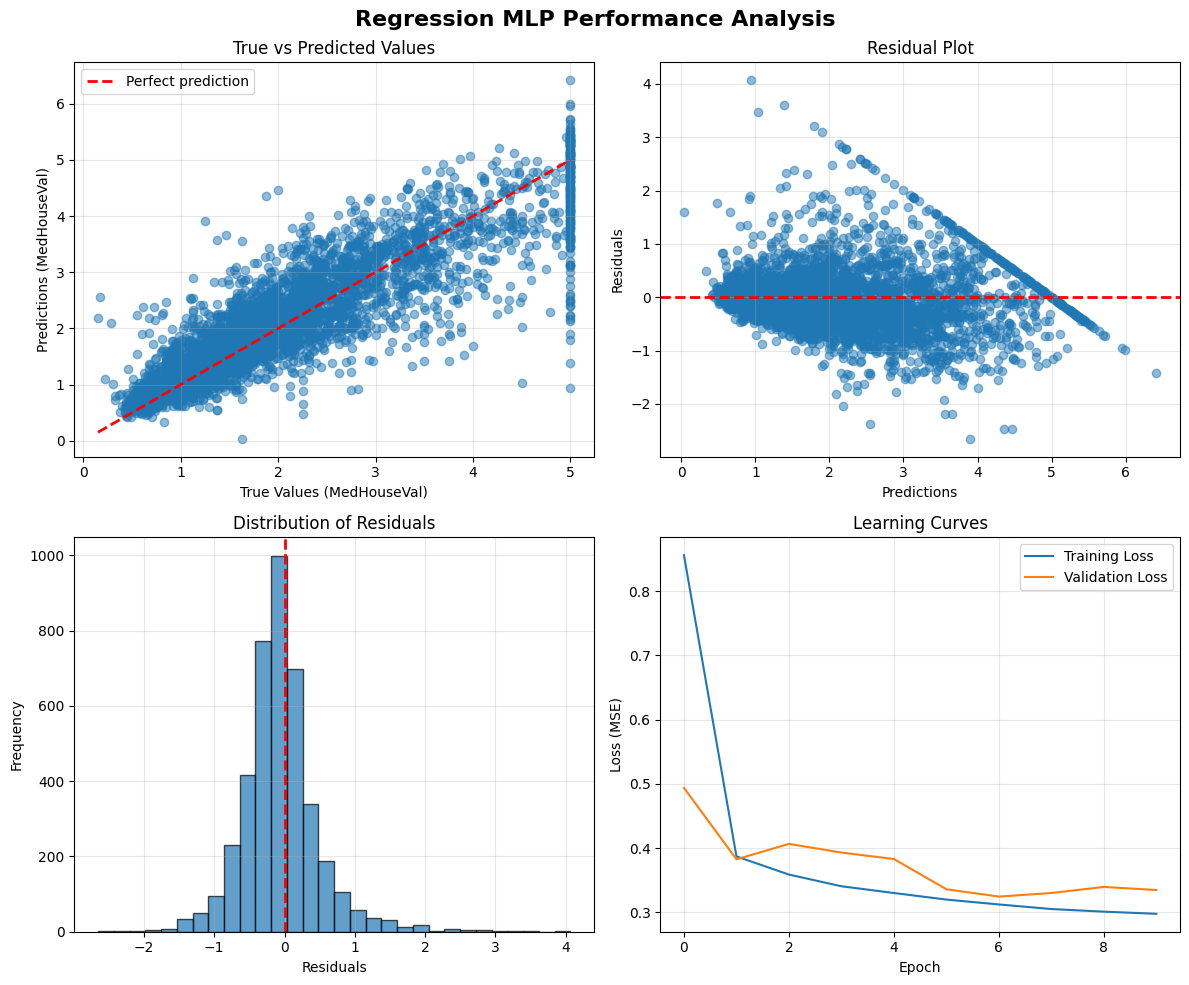


9. PREDIKSI UNTUK SAMPLE BARU:

Sample 0:
  True value: $47,700
  Predicted: $56,392
  Error: $8,692 (18.2%)

Sample 10:
  True value: $123,200
  Predicted: $87,128
  Error: $36,072 (29.3%)

Sample 20:
  True value: $425,000
  Predicted: $480,527
  Error: $55,527 (13.1%)


In [9]:
# Plot results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. True vs Predicted values
axes[0, 0].scatter(y_test, y_pred, alpha=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', lw=2, label='Perfect prediction')
axes[0, 0].set_xlabel('True Values (MedHouseVal)')
axes[0, 0].set_ylabel('Predictions (MedHouseVal)')
axes[0, 0].set_title('True vs Predicted Values')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residual plot
residuals = y_test - y_pred
axes[0, 1].scatter(y_pred, residuals, alpha=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predictions')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(True, alpha=0.3)

# 3. Error distribution
axes[1, 0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Residuals')
axes[1, 0].grid(True, alpha=0.3)

# 4. Learning curves
axes[1, 1].plot(history.history['loss'], label='Training Loss')
axes[1, 1].plot(history.history['val_loss'], label='Validation Loss')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss (MSE)')
axes[1, 1].set_title('Learning Curves')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Regression MLP Performance Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Predict on new samples
print("\n9. PREDIKSI UNTUK SAMPLE BARU:")
sample_indices = [0, 10, 20]
for idx in sample_indices:
    true_val = y_test[idx]
    pred_val = y_pred[idx]
    error = abs(true_val - pred_val)

    print(f"\nSample {idx}:")
    print(f"  True value: ${true_val*100000:,.0f}")
    print(f"  Predicted: ${pred_val*100000:,.0f}")
    print(f"  Error: ${error*100000:,.0f} ({error/true_val*100:.1f}%)")

#**7. Functional API untuk Wide & Deep Network**
---

### **Wide & Deep Neural Network**
Wide & Deep Network menghubungkan input langsung ke output layer (wide path) sekaligus melalui hidden layers (deep path). Ini memungkinkan model mempelajari pola sederhana dan kompleks secara bersamaan.

In [10]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

### **Multiple Inputs**
Untuk kasus dimana subset fitur berbeda diproses melalui path yang berbeda. Contoh: 5 fitur pertama melalui wide path, 6 fitur (dimulai dari fitur ke-2) melalui deep path.

In [11]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

### **Melatih model dengan multiple inputs**
Ketika model memiliki multiple inputs, data training harus diberikan sebagai tuple atau dictionary.

In [12]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A = X_train_scaled[:, :5]
X_train_B = X_train_scaled[:, 2:]
X_valid_A = X_valid_scaled[:, :5]
X_valid_B = X_valid_scaled[:, 2:]
X_test_A = X_test_scaled[:, :5]
X_test_B = X_test_scaled[:, 2:]
X_new_A = X_test_A[:3]
X_new_B = X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

print(f"MSE: {mse_test:.4f}")

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7532 - val_loss: 0.8234
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7441 - val_loss: 0.6953
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6520 - val_loss: 0.6484
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6016 - val_loss: 0.6142
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5639 - val_loss: 0.5830
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5695 - val_loss: 0.5587
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5378 - val_loss: 0.5398
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5086 - val_loss: 0.5240
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5054 - val_loss: 0.5141
Epoch 10/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4899 - val_loss: 0.5043
Epoch 11/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4715 - val_loss: 0.4994
Epoch 12/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

# **8. Multiple Outputs dengan Auxiliary Output**
Multiple outputs berguna untuk:
* Multi-task learning (misal: prediksi lokasi dan klasifikasi objek)
* Regularization dengan auxiliary output
* Kasus dimana satu instance memiliki multiple label

In [13]:
# Menambahkan auxiliary output dari hidden layer kedua
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B],
                    outputs=[output, aux_output])

# Compile dengan multiple loss functions dan weights
model.compile(loss=["mse", "mse"],
              loss_weights=[0.9, 0.1],  # Main output lebih penting
              optimizer="sgd")

# Training dengan multiple outputs (label sama untuk kedua output)
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

# Evaluasi mengembalikan total loss dan individual losses
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

# Prediksi mengembalikan output untuk setiap output layer
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - aux_output_loss: 2.6935 - loss: 1.3416 - main_output_loss: 1.1914 - val_aux_output_loss: 1.0554 - val_loss: 0.9798 - val_main_output_loss: 0.9672
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 0.9045 - loss: 0.5433 - main_output_loss: 0.5031 - val_aux_output_loss: 0.9883 - val_loss: 0.5292 - val_main_output_loss: 0.4768
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.7548 - loss: 0.4420 - main_output_loss: 0.4072 - val_aux_output_loss: 0.8348 - val_loss: 0.4770 - val_main_output_loss: 0.4363
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - aux_output_loss: 0.6615 - loss: 0.4422 - main_output_loss: 0.4179 - val_aux_output_loss: 0.7547 - val_loss: 0.4588 - val_main_output_loss: 0.4251
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 0.6195 - loss: 0.4127 - main_output_loss: 0.3898 - val_aux_output_loss: 0.6982 - val_loss: 0.4457 - val_main_output_loss: 0.4170


# **9. Subclassing API**
Subclassing API memberikan fleksibilitas maksimal dengan mendefinisikan model sebagai class Python. Cocok untuk arsitektur dinamis dengan loops, conditional branching, atau operasi TensorFlow tingkat rendah.

In [14]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        # Mendefinisikan layers di constructor
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        # Forward pass logic
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

# Membuat instance model
model = WideAndDeepModel()

### **Menyimpan dan Memuat Model**
Keras menyimpan model dalam format HDF5 (.h5) yang berisi arsitektur, weights, dan optimizer state.

In [15]:
# Menyimpan model
model.save("my_keras_model.h5")

# Memuat model, menyediakan kelas kustom
model = keras.models.load_model("my_keras_model.h5", custom_objects={"WideAndDeepModel": WideAndDeepModel})

# **10. Callbacks**
### **ModelCheckpoint Callback**
Menyimpan checkpoint model secara berkala selama training

In [16]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")

# Recompile the model after loading, using the same configuration as the original multiple-output model
model.compile(loss=["mse", "mse"],
              loss_weights=[0.9, 0.1],
              optimizer="sgd")

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=10,
                    callbacks=[checkpoint_cb],
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/10
389/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7939 - mse_loss: 3.4334

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7530 - mse_loss: 3.3582 - val_loss: 8.3592 - val_mse_loss: 4.1904
Epoch 2/10
410/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0677 - mse_loss: 1.3432

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0659 - mse_loss: 1.3421 - val_loss: 0.5951 - val_mse_loss: 1.1043
Epoch 3/10
399/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5622 - mse_loss: 1.0004

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5612 - mse_loss: 0.9984 - val_loss: 0.5361 - val_mse_loss: 0.9181
Epoch 4/10
401/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4937 - mse_loss: 0.8348

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4938 - mse_loss: 0.8341 - val_loss: 0.5072 - val_mse_loss: 0.8125
Epoch 5/10
392/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4555 - mse_loss: 0.7231

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4559 - mse_loss: 0.7230 - val_loss: 0.4777 - val_mse_loss: 0.7361
Epoch 6/10
407/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4376 - mse_loss: 0.6573

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4376 - mse_loss: 0.6573 - val_loss: 0.4579 - val_mse_loss: 0.6929
Epoch 7/10
390/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4265 - mse_loss: 0.6144

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4266 - mse_loss: 0.6145 - val_loss: 0.4460 - val_mse_loss: 0.6624
Epoch 8/10
405/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4277 - mse_loss: 0.6098

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4274 - mse_loss: 0.6094 - val_loss: 0.4629 - val_mse_loss: 0.6460
Epoch 9/10
400/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4103 - mse_loss: 0.5814

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4102 - mse_loss: 0.5812 - val_loss: 0.4296 - val_mse_loss: 0.6300
Epoch 10/10
411/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3992 - mse_loss: 0.5640

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3992 - mse_loss: 0.5639 - val_loss: 0.4744 - val_mse_loss: 0.6470


### **Early Stopping**
Menghentikan training ketika validation performance tidak membaik setelah beberapa epoch.

In [17]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10,  # Tunggu 10 epoch tanpa improvement
    restore_best_weights=True  # Kembali ke weights terbaik
)

# Menggabungkan checkpoint dan early stopping
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=100,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
405/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3850 - mse_loss: 0.5422

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3853 - mse_loss: 0.5425 - val_loss: 0.4199 - val_mse_loss: 0.6090
Epoch 2/100
410/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3755 - mse_loss: 0.5320

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3756 - mse_loss: 0.5321 - val_loss: 0.4175 - val_mse_loss: 0.6009
Epoch 3/100
406/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3871 - mse_loss: 0.5384

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3871 - mse_loss: 0.5384 - val_loss: 0.4092 - val_mse_loss: 0.5965
Epoch 4/100
412/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3793 - mse_loss: 0.5350

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3793 - mse_loss: 0.5350 - val_loss: 0.4137 - val_mse_loss: 0.5951
Epoch 5/100
409/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3784 - mse_loss: 0.5289

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3784 - mse_loss: 0.5289 - val_loss: 0.4092 - val_mse_loss: 0.5830
Epoch 6/100
391/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3869 - mse_loss: 0.5328

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3862 - mse_loss: 0.5322 - val_loss: 0.3928 - val_mse_loss: 0.5802
Epoch 7/100
402/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3529 - mse_loss: 0.5025

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3534 - mse_loss: 0.5029 - val_loss: 0.3864 - val_mse_loss: 0.5698
Epoch 8/100
408/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3633 - mse_loss: 0.5035

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3633 - mse_loss: 0.5036 - val_loss: 0.3882 - val_mse_loss: 0.5636
Epoch 9/100
392/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3595 - mse_loss: 0.4960

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3597 - mse_loss: 0.4965 - val_loss: 0.3844 - val_mse_loss: 0.5569
Epoch 10/100
388/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3486 - mse_loss: 0.4863

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3493 - mse_loss: 0.4871 - val_loss: 0.4837 - val_mse_loss: 0.5910
Epoch 11/100
395/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3739 - mse_loss: 0.5044

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3731 - mse_loss: 0.5039 - val_loss: 0.3759 - val_mse_loss: 0.5521
Epoch 12/100
400/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3552 - mse_loss: 0.4938

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3552 - mse_loss: 0.4937 - val_loss: 0.3760 - val_mse_loss: 0.5421
Epoch 13/100
401/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3471 - mse_loss: 0.4820

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3472 - mse_loss: 0.4821 - val_loss: 0.3743 - val_mse_loss: 0.5413
Epoch 14/100
410/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3577 - mse_loss: 0.4886

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3576 - mse_loss: 0.4885 - val_loss: 0.3742 - val_mse_loss: 0.5289
Epoch 15/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3608 - mse_loss: 0.4792

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3608 - mse_loss: 0.4792 - val_loss: 0.3768 - val_mse_loss: 0.5241
Epoch 16/100
390/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3572 - mse_loss: 0.4853

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3566 - mse_loss: 0.4846 - val_loss: 0.3656 - val_mse_loss: 0.5209
Epoch 17/100
403/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3406 - mse_loss: 0.4666

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3407 - mse_loss: 0.4667 - val_loss: 0.3557 - val_mse_loss: 0.5151
Epoch 18/100
399/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3536 - mse_loss: 0.4775

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3533 - mse_loss: 0.4772 - val_loss: 0.3562 - val_mse_loss: 0.5116
Epoch 19/100
401/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3497 - mse_loss: 0.4777

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3495 - mse_loss: 0.4772 - val_loss: 0.3616 - val_mse_loss: 0.5047
Epoch 20/100
405/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3366 - mse_loss: 0.4561

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3367 - mse_loss: 0.4561 - val_loss: 0.3520 - val_mse_loss: 0.5001
Epoch 21/100
401/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3317 - mse_loss: 0.4546

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3319 - mse_loss: 0.4546 - val_loss: 0.3511 - val_mse_loss: 0.4997
Epoch 22/100
396/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3311 - mse_loss: 0.4418

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3314 - mse_loss: 0.4422 - val_loss: 0.3467 - val_mse_loss: 0.4916
Epoch 23/100
406/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3389 - mse_loss: 0.4436

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3388 - mse_loss: 0.4436 - val_loss: 0.4043 - val_mse_loss: 0.5013
Epoch 24/100
398/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3251 - mse_loss: 0.4333

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3255 - mse_loss: 0.4337 - val_loss: 0.3539 - val_mse_loss: 0.4864
Epoch 25/100
412/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3359 - mse_loss: 0.4365

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3358 - mse_loss: 0.4365 - val_loss: 0.3662 - val_mse_loss: 0.4875
Epoch 26/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3312 - mse_loss: 0.4384

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3312 - mse_loss: 0.4384 - val_loss: 0.3445 - val_mse_loss: 0.4781
Epoch 27/100
398/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3250 - mse_loss: 0.4209

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3253 - mse_loss: 0.4214 - val_loss: 0.3473 - val_mse_loss: 0.4697
Epoch 28/100
406/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3385 - mse_loss: 0.4401

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3383 - mse_loss: 0.4399 - val_loss: 0.3562 - val_mse_loss: 0.4720
Epoch 29/100
402/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3263 - mse_loss: 0.4242

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3264 - mse_loss: 0.4243 - val_loss: 0.3475 - val_mse_loss: 0.4686
Epoch 30/100
386/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3359 - mse_loss: 0.4253

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3354 - mse_loss: 0.4254 - val_loss: 0.3426 - val_mse_loss: 0.4596
Epoch 31/100
385/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3357 - mse_loss: 0.4349

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3352 - mse_loss: 0.4341 - val_loss: 0.3389 - val_mse_loss: 0.4585
Epoch 32/100
407/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3191 - mse_loss: 0.4097

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3192 - mse_loss: 0.4099 - val_loss: 0.3423 - val_mse_loss: 0.4548
Epoch 33/100
408/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3311 - mse_loss: 0.4284

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3310 - mse_loss: 0.4282 - val_loss: 0.3392 - val_mse_loss: 0.4539
Epoch 34/100
406/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3215 - mse_loss: 0.4153

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3216 - mse_loss: 0.4153 - val_loss: 0.3466 - val_mse_loss: 0.4567
Epoch 35/100
404/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3105 - mse_loss: 0.4070

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3109 - mse_loss: 0.4072 - val_loss: 0.3373 - val_mse_loss: 0.4531
Epoch 36/100
398/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3344 - mse_loss: 0.4205

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3340 - mse_loss: 0.4202 - val_loss: 0.3666 - val_mse_loss: 0.4695
Epoch 37/100
398/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3289 - mse_loss: 0.4142

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3287 - mse_loss: 0.4140 - val_loss: 0.3469 - val_mse_loss: 0.4471
Epoch 38/100
407/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3157 - mse_loss: 0.4031

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3158 - mse_loss: 0.4031 - val_loss: 0.3322 - val_mse_loss: 0.4388
Epoch 39/100
401/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3235 - mse_loss: 0.4025

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3234 - mse_loss: 0.4026 - val_loss: 0.3304 - val_mse_loss: 0.4348
Epoch 40/100
402/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3250 - mse_loss: 0.4094

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3249 - mse_loss: 0.4092 - val_loss: 0.3374 - val_mse_loss: 0.4329
Epoch 41/100
384/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3094 - mse_loss: 0.3908

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3102 - mse_loss: 0.3915 - val_loss: 0.3433 - val_mse_loss: 0.4354
Epoch 42/100
398/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3219 - mse_loss: 0.3949

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3218 - mse_loss: 0.3951 - val_loss: 0.3277 - val_mse_loss: 0.4271
Epoch 43/100
389/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3083 - mse_loss: 0.3847

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3089 - mse_loss: 0.3854 - val_loss: 0.3321 - val_mse_loss: 0.4305
Epoch 44/100
405/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3258 - mse_loss: 0.3998

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3256 - mse_loss: 0.3998 - val_loss: 0.3319 - val_mse_loss: 0.4242
Epoch 45/100
398/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3137 - mse_loss: 0.3924

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3138 - mse_loss: 0.3925 - val_loss: 0.3372 - val_mse_loss: 0.4259
Epoch 46/100
396/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3266 - mse_loss: 0.4029

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3262 - mse_loss: 0.4025 - val_loss: 0.3320 - val_mse_loss: 0.4249
Epoch 47/100
405/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3193 - mse_loss: 0.4023

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3192 - mse_loss: 0.4021 - val_loss: 0.3257 - val_mse_loss: 0.4177
Epoch 48/100
405/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3236 - mse_loss: 0.4010

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3234 - mse_loss: 0.4007 - val_loss: 0.3283 - val_mse_loss: 0.4230
Epoch 49/100
408/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3098 - mse_loss: 0.3847

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3099 - mse_loss: 0.3847 - val_loss: 0.3312 - val_mse_loss: 0.4212
Epoch 50/100
409/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3107 - mse_loss: 0.3866

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3107 - mse_loss: 0.3866 - val_loss: 0.3280 - val_mse_loss: 0.4162
Epoch 51/100
398/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3083 - mse_loss: 0.3824

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3085 - mse_loss: 0.3826 - val_loss: 0.3253 - val_mse_loss: 0.4137
Epoch 52/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3088 - mse_loss: 0.3746

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3088 - mse_loss: 0.3746 - val_loss: 0.3274 - val_mse_loss: 0.4130
Epoch 53/100
399/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3154 - mse_loss: 0.3838

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3153 - mse_loss: 0.3837 - val_loss: 0.3264 - val_mse_loss: 0.4117
Epoch 54/100
406/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3052 - mse_loss: 0.3767

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3053 - mse_loss: 0.3769 - val_loss: 0.3310 - val_mse_loss: 0.4123
Epoch 55/100
411/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3246 - mse_loss: 0.3936

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3245 - mse_loss: 0.3935 - val_loss: 0.3285 - val_mse_loss: 0.4095
Epoch 56/100
391/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3132 - mse_loss: 0.3801

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3131 - mse_loss: 0.3801 - val_loss: 0.3276 - val_mse_loss: 0.4122
Epoch 57/100
408/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3030 - mse_loss: 0.3694

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3032 - mse_loss: 0.3696 - val_loss: 0.3225 - val_mse_loss: 0.4077
Epoch 58/100
409/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3111 - mse_loss: 0.3839

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3111 - mse_loss: 0.3839 - val_loss: 0.3225 - val_mse_loss: 0.4032
Epoch 59/100
402/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3079 - mse_loss: 0.3810

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3080 - mse_loss: 0.3810 - val_loss: 0.3230 - val_mse_loss: 0.4068
Epoch 60/100
400/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3122 - mse_loss: 0.3738

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3121 - mse_loss: 0.3740 - val_loss: 0.3219 - val_mse_loss: 0.4035
Epoch 61/100
406/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2971 - mse_loss: 0.3685

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2974 - mse_loss: 0.3687 - val_loss: 0.3283 - val_mse_loss: 0.4044
Epoch 62/100
406/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3004 - mse_loss: 0.3677

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3006 - mse_loss: 0.3679 - val_loss: 0.3217 - val_mse_loss: 0.4002
Epoch 63/100
401/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3084 - mse_loss: 0.3764

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3084 - mse_loss: 0.3764 - val_loss: 0.3256 - val_mse_loss: 0.4052
Epoch 64/100
396/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3023 - mse_loss: 0.3667

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3025 - mse_loss: 0.3670 - val_loss: 0.3245 - val_mse_loss: 0.4008
Epoch 65/100
387/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3132 - mse_loss: 0.3788

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3129 - mse_loss: 0.3784 - val_loss: 0.3208 - val_mse_loss: 0.3970
Epoch 66/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3142 - mse_loss: 0.3778

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3142 - mse_loss: 0.3778 - val_loss: 0.3239 - val_mse_loss: 0.3983
Epoch 67/100
410/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3113 - mse_loss: 0.3782

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3113 - mse_loss: 0.3781 - val_loss: 0.3241 - val_mse_loss: 0.3962
Epoch 68/100
406/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3061 - mse_loss: 0.3714

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3062 - mse_loss: 0.3714 - val_loss: 0.3231 - val_mse_loss: 0.3969
Epoch 69/100
393/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3000 - mse_loss: 0.3645

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3004 - mse_loss: 0.3648 - val_loss: 0.3245 - val_mse_loss: 0.3962
Epoch 70/100
388/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3159 - mse_loss: 0.3894

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3154 - mse_loss: 0.3884 - val_loss: 0.3298 - val_mse_loss: 0.4008
Epoch 71/100
400/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3018 - mse_loss: 0.3662

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3020 - mse_loss: 0.3663 - val_loss: 0.3321 - val_mse_loss: 0.4033
Epoch 72/100
403/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3050 - mse_loss: 0.3654

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3051 - mse_loss: 0.3655 - val_loss: 0.3304 - val_mse_loss: 0.3989
Epoch 73/100
392/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3108 - mse_loss: 0.3806

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3106 - mse_loss: 0.3800 - val_loss: 0.3212 - val_mse_loss: 0.3913
Epoch 74/100
398/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3054 - mse_loss: 0.3706

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3055 - mse_loss: 0.3705 - val_loss: 0.3179 - val_mse_loss: 0.3915
Epoch 75/100
395/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3039 - mse_loss: 0.3678

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3040 - mse_loss: 0.3678 - val_loss: 0.3330 - val_mse_loss: 0.4001
Epoch 76/100
397/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3151 - mse_loss: 0.3788

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3147 - mse_loss: 0.3782 - val_loss: 0.3203 - val_mse_loss: 0.3902
Epoch 77/100
403/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2944 - mse_loss: 0.3558

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2947 - mse_loss: 0.3561 - val_loss: 0.3216 - val_mse_loss: 0.3932
Epoch 78/100
399/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3055 - mse_loss: 0.3689

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3055 - mse_loss: 0.3688 - val_loss: 0.3172 - val_mse_loss: 0.3882
Epoch 79/100
399/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2995 - mse_loss: 0.3650

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2997 - mse_loss: 0.3651 - val_loss: 0.3279 - val_mse_loss: 0.3971
Epoch 80/100
398/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3139 - mse_loss: 0.3692

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3135 - mse_loss: 0.3690 - val_loss: 0.3212 - val_mse_loss: 0.3853
Epoch 81/100
395/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3108 - mse_loss: 0.3692

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3105 - mse_loss: 0.3690 - val_loss: 0.3173 - val_mse_loss: 0.3876
Epoch 82/100
411/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3060 - mse_loss: 0.3669

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3060 - mse_loss: 0.3669 - val_loss: 0.3262 - val_mse_loss: 0.3890
Epoch 83/100
398/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3028 - mse_loss: 0.3602

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3028 - mse_loss: 0.3603 - val_loss: 0.3238 - val_mse_loss: 0.3898
Epoch 84/100
411/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3012 - mse_loss: 0.3660

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3012 - mse_loss: 0.3659 - val_loss: 0.3277 - val_mse_loss: 0.3864
Epoch 85/100
400/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3163 - mse_loss: 0.3777

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3159 - mse_loss: 0.3772 - val_loss: 0.3257 - val_mse_loss: 0.3947
Epoch 86/100
386/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3026 - mse_loss: 0.3639

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3025 - mse_loss: 0.3637 - val_loss: 0.3158 - val_mse_loss: 0.3849
Epoch 87/100
412/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3054 - mse_loss: 0.3592

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3054 - mse_loss: 0.3592 - val_loss: 0.3202 - val_mse_loss: 0.3860
Epoch 88/100
408/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3075 - mse_loss: 0.3692

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3074 - mse_loss: 0.3691 - val_loss: 0.3295 - val_mse_loss: 0.3944
Epoch 89/100
396/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3054 - mse_loss: 0.3666

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3053 - mse_loss: 0.3662 - val_loss: 0.3141 - val_mse_loss: 0.3831
Epoch 90/100
391/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3037 - mse_loss: 0.3632

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3036 - mse_loss: 0.3631 - val_loss: 0.3178 - val_mse_loss: 0.3869
Epoch 91/100
404/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2992 - mse_loss: 0.3540

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2992 - mse_loss: 0.3541 - val_loss: 0.3122 - val_mse_loss: 0.3825
Epoch 92/100
387/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2974 - mse_loss: 0.3582

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2975 - mse_loss: 0.3581 - val_loss: 0.3368 - val_mse_loss: 0.3905
Epoch 93/100
407/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2971 - mse_loss: 0.3521

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2972 - mse_loss: 0.3522 - val_loss: 0.3167 - val_mse_loss: 0.3807
Epoch 94/100
390/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3008 - mse_loss: 0.3599

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3008 - mse_loss: 0.3597 - val_loss: 0.3219 - val_mse_loss: 0.3883
Epoch 95/100
412/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3102 - mse_loss: 0.3649

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3102 - mse_loss: 0.3648 - val_loss: 0.3188 - val_mse_loss: 0.3830
Epoch 96/100
400/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3025 - mse_loss: 0.3576

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3024 - mse_loss: 0.3577 - val_loss: 0.3233 - val_mse_loss: 0.3869
Epoch 97/100
387/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3002 - mse_loss: 0.3533

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3002 - mse_loss: 0.3535 - val_loss: 0.3238 - val_mse_loss: 0.3844
Epoch 98/100
389/413 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3007 - mse_loss: 0.3506

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3007 - mse_loss: 0.3510 - val_loss: 0.3220 - val_mse_loss: 0.3813
Epoch 99/100
408/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2925 - mse_loss: 0.3476

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2926 - mse_loss: 0.3477 - val_loss: 0.3249 - val_mse_loss: 0.3880
Epoch 100/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3056 - mse_loss: 0.3657

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3056 - mse_loss: 0.3657 - val_loss: 0.3199 - val_mse_loss: 0.3830


### **Custom Callback**
Membuat callback kustom untuk memantau metrik tertentu.

In [18]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        # Menampilkan rasio validation loss / training loss
        ratio = logs["val_loss"] / logs["loss"]
        print(f"\nval/train: {ratio:.2f}")

# **11. TensorBoard Visualization**
TensorBoard adalah tool visualisasi untuk memantau training, menampilkan learning curves, dan menganalisis model.

In [19]:
import os
import time

# Setup log directory
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    # Membuat unique run ID berdasarkan timestamp
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

# TensorBoard callback
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=30,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                    callbacks=[tensorboard_cb])

Epoch 1/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3042 - mse_loss: 0.3538 - val_loss: 0.3211 - val_mse_loss: 0.3844
Epoch 2/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3064 - mse_loss: 0.3669 - val_loss: 0.3161 - val_mse_loss: 0.3849
Epoch 3/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2918 - mse_loss: 0.3549 - val_loss: 0.3223 - val_mse_loss: 0.3851
Epoch 4/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2997 - mse_loss: 0.3584 - val_loss: 0.3261 - val_mse_loss: 0.3882
Epoch 5/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2968 - mse_loss: 0.3560 - val_loss: 0.3152 - val_mse_loss: 0.3835
Epoch 6/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2952 - mse_loss: 0.3535 - val_loss: 0.3221 - val_mse_loss: 0.3919
Epoch 7/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3025 - mse_loss: 0.3593 - val_loss: 0.3192 - val_mse_loss: 0.3879
Epoch 8/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3084 - mse_loss: 0.3655 - val_loss: 0.3138

# **12. Fine-Tuning Hyperparameters dengan RandomizedSearchCV**
### **Fungsi untuk Membangun Model**
Membuat fungsi yang membangun dan mengompilasi model dengan hyperparameters sebagai input.

In [20]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))

    # Menambahkan hidden layers
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))

    # Output layer untuk regresi
    model.add(keras.layers.Dense(1))

    # Optimizer dengan learning rate tertentu
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

### **Membungkus Model Keras dalam KerasRegressor**
KerasRegressor adalah wrapper yang membuat model Keras kompatibel dengan Scikit-Learn API.

In [21]:
# First, ensure scikeras is installed:
!pip install scikeras

from scikeras.wrappers import KerasRegressor
keras_reg = KerasRegressor(model=build_model)

### **Randomized Search**
Melakukan randomized search untuk menemukan kombinasi hyperparameter terbaik.

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from tensorflow import keras
from scikeras.wrappers import KerasRegressor

# Distribusi hyperparameter untuk dicari
param_distribs = {
    "model__n_hidden": [0, 1, 2, 3],  # Jumlah hidden layers
    "model__n_neurons": np.arange(1, 100),  # Jumlah neuron per layer
    "model__learning_rate": reciprocal(3e-4, 3e-2),  # Learning rate (distribusi log-uniform)
}

# Re-inisialisasi KerasRegressor dengan input_shape yang tetap dan updated build_model
kera_reg = KerasRegressor(
    model=build_model,
    input_shape=X_train.shape[1:], # Pass the fixed input_shape here
    epochs=10,                     # Default for KerasRegressor, akan diganti oleh fit
    batch_size=32,                 # Default for KerasRegressor, akan diganti oleh fit
    verbose=0                      # Suppress verbose output during grid search
)

# Randomized search dengan 10 iterasi dan 3-fold CV
rnd_search_cv = RandomizedSearchCV(kera_reg, param_distribs,
                                   n_iter=10, cv=3, scoring='neg_mean_squared_error') # Explicitly set scoring

# Training dengan early stopping
rnd_search_cv.fit(X_train_scaled, y_train, epochs=100,
                  validation_data=(X_valid_scaled, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

# Mengakses hasil terbaik
print("Best parameters:", rnd_search_cv.best_params_)
print("Best score:", rnd_search_cv.best_score_)
model = rnd_search_cv.best_estimator_.model

In [26]:
from tensorflow import keras
import numpy as np

# 1. BATCH SIZE TRADEOFFS
def train_with_different_batch_sizes(X_train, y_train, batch_sizes=[16, 32, 64, 128]):
    histories = {}

    for batch_size in batch_sizes:
        print(f"\nTraining dengan batch size = {batch_size}")
        model = create_simple_model()

        history = model.fit(
            X_train, y_train,
            batch_size=batch_size,
            epochs=10,
            validation_split=0.2,
            verbose=0
        )

        histories[batch_size] = history
        print(f"Final accuracy: {history.history['val_accuracy'][-1]:.4f}")

    return histories

# 2. LEARNING RATE FINDING (LR Range Test)
def find_optimal_learning_rate(model, X_train, y_train, min_lr=1e-5, max_lr=1, steps=1000):
    """
    Teknik untuk mencari learning rate optimal
    """
    # Buat callback untuk mengubah learning rate selama training
    lr_schedule = keras.callbacks.LearningRateScheduler(
        lambda epoch: min_lr * (max_lr/min_lr) ** (epoch/steps)
    )

    # Train model singkat
    history = model.fit(
        X_train[:1000], y_train[:1000],  # Gunakan subset kecil
        epochs=steps,
        callbacks=[lr_schedule],
        verbose=0
    )

    # Plot loss vs learning rate
    import matplotlib.pyplot as plt

    lrs = min_lr * (max_lr/min_lr) ** (np.arange(steps)/steps)
    plt.figure(figsize=(10, 6))
    plt.semilogx(lrs, history.history['loss'])
    plt.xlabel("Learning Rate")
    plt.ylabel("Loss")
    plt.title("Mencari Optimal Learning Rate")
    plt.grid(True)

    # Optimal LR biasanya 10x lebih kecil dari titik loss naik
    plt.axvline(x=max_lr/10, color='r', linestyle='--', label='Suggested LR')
    plt.legend()
    plt.show()

    return max_lr / 10  # Learning rate yang disarankan

# **10. Regularization dan Overfitting Prevention**
---
Teknik untuk mencegah overfitting:

In [27]:
from tensorflow import keras
import numpy as np

# 1. L1/L2 REGULARIZATION
model_with_l2 = keras.Sequential([
    keras.layers.Dense(100, activation="relu",
                      kernel_regularizer=keras.regularizers.l2(0.01),
                      input_shape=(20,)),
    keras.layers.Dense(10, activation="softmax")
])

# 2. DROPOUT
model_with_dropout = keras.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=(20,)),
    keras.layers.Dropout(0.5),  # Dropout 50% neurons
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.3),  # Dropout 30% neurons
    keras.layers.Dense(10, activation="softmax")
])

# 3. EARLY STOPPING dengan patience
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,               # Tunggu 10 epoch tanpa improvement
    restore_best_weights=True, # Kembali ke weights terbaik
    min_delta=0.001,           # Minimum improvement
    monitor='val_loss'         # Metric yang dimonitor
)

# 4. DATA AUGMENTATION (untuk image data)
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
])

# 5. MODEL ENSEMBLING
def create_ensemble(models, X, method='average'):
    """
    Membuat ensemble dari beberapa model
    """
    predictions = []
    for model in models:
        pred = model.predict(X)
        predictions.append(pred)

    predictions = np.array(predictions)

    if method == 'average':
        return np.mean(predictions, axis=0)
    elif method == 'voting':
        # Untuk classification
        return np.round(np.mean(predictions, axis=0))
    elif method == 'stacking':
        # Train meta-learner pada predictions
        pass

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **11. TensorBoard untuk Visualization dan Monitoring**
---
TensorBoard adalah tool untuk memvisualisasikan training process:

In [28]:
  import os
import datetime
from tensorflow import keras

# Setup logging directory
log_dir = os.path.join("logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# TensorBoard callback
tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,           # Log weights histograms setiap epoch
    write_graph=True,           # Visualize computation graph
    write_images=True,          # Visualize weights as images
    update_freq='epoch',        # Update setiap epoch
    profile_batch=0,            # Disable profiling
)

# Custom metrics logging
class CustomTensorBoardCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Log custom metrics
        if logs is not None:
            # Hitung custom metric (contoh: accuracy ratio)
            if 'val_accuracy' in logs and 'accuracy' in logs:
                accuracy_ratio = logs['val_accuracy'] / logs['accuracy']

                # Log ke TensorBoard
                with tf.summary.create_file_writer(self.log_dir).as_default():
                    tf.summary.scalar('accuracy_ratio', accuracy_ratio, step=epoch)

        # Juga bisa log weights
        if epoch % 5 == 0:
            for layer in self.model.layers:
                if hasattr(layer, 'kernel'):
                    weights = layer.kernel.numpy()
                    with tf.summary.create_file_writer(self.log_dir).as_default():
                        tf.summary.histogram(f"{layer.name}/weights", weights, step=epoch)